### RSI 전략
- 상대 강도 지수
- RSI = 100 - (100 / (1 + 평균 기간 하락폭 / 평균 기간 상승폭)) : 기간은 14일
- RSI가 30 미만이면 매수
- RSI가 70 초과면 매도
- 사용 범위 
    + RSI > 70 : 과매수 상태
    + RSI < 30 : 과매도 상태

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [55]:
from pykrx import stock
df_stock = stock.get_market_ohlcv_by_date('20000101','20191231','000660') # SK 하이닉스
df_stock_close = df_stock[['종가']]
df_stock_close.head() 

,종가
날짜,
2000-01-04,505462
2000-01-05,453444
2000-01-06,429888
2000-01-07,425962
2000-01-10,422037


In [56]:
df_stock_close.describe()

,종가
count,4936.000000
mean,49434.978728
std,75936.456567
min,2650.000000
25%,21137.500000
50%,29450.000000
75%,47200.000000
max,543740.000000


In [57]:
df_stock_close['변화량'] = df_stock_close['종가'] - df_stock_close['종가'].shift(1)
df_stock_close


/tmp/ipykernel_12184/1824894257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close['변화량'] = df_stock_close['종가'] - df_stock_close['종가'].shift(1)


,종가,변화량
날짜,,
2000-01-04,505462,NaN
2000-01-05,453444,-52018.0
2000-01-06,429888,-23556.0
2000-01-07,425962,-3926.0
2000-01-10,422037,-3925.0
...,...,...
2019-12-23,94600,-400.0
2019-12-24,93800,-800.0
2019-12-26,94800,1000.0


In [58]:
condition_up = df_stock_close['변화량'] >= 0
condition_down = df_stock_close['변화량'] < 0
condition_down


날짜
2000-01-04    False
2000-01-05     True
2000-01-06     True
2000-01-07     True
2000-01-10     True
              ...  
2019-12-23     True
2019-12-24     True
2019-12-26    False
2019-12-27    False
2019-12-30     True
Name: 변화량, Length: 4936, dtype: bool

In [59]:
df_stock_close.loc[condition_up, '상승폭'] = df_stock_close['변화량'] # =을 기준으로 앞과 뒤가 달라지면 달라짐.. 결국 = 앞에 있는게 새로운 칼럼을 만들어진다고

df_stock_close.loc[condition_down, '하락폭'] = -df_stock_close['변화량']
df_stock_close

/tmp/ipykernel_12184/3381282071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close.loc[condition_up, '상승폭'] = df_stock_close['변화량'] # =을 기준으로 앞과 뒤가 달라지면 달라짐.. 결국 = 앞에 있는게 새로운 칼럼을 만들어진다고
/tmp/ipykernel_12184/3381282071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close.loc[condition_down, '하락폭'] = -df_stock_close['변화량']


,종가,변화량,상승폭,하락폭
날짜,,,,
2000-01-04,505462,NaN,NaN,NaN
2000-01-05,453444,-52018.0,NaN,52018.0
2000-01-06,429888,-23556.0,NaN,23556.0
2000-01-07,425962,-3926.0,NaN,3926.0
2000-01-10,422037,-3925.0,NaN,3925.0
...,...,...,...,...
2019-12-23,94600,-400.0,NaN,400.0
2019-12-24,93800,-800.0,NaN,800.0
2019-12-26,94800,1000.0,1000.0,NaN


In [60]:
df_stock_close = df_stock_close.fillna(0)
df_stock_close

,종가,변화량,상승폭,하락폭
날짜,,,,
2000-01-04,505462,0.0,0.0,0.0
2000-01-05,453444,-52018.0,0.0,52018.0
2000-01-06,429888,-23556.0,0.0,23556.0
2000-01-07,425962,-3926.0,0.0,3926.0
2000-01-10,422037,-3925.0,0.0,3925.0
...,...,...,...,...
2019-12-23,94600,-400.0,0.0,400.0
2019-12-24,93800,-800.0,0.0,800.0
2019-12-26,94800,1000.0,1000.0,0.0


### 14 기간 대한 RSI

In [61]:
# print(df_stock_close.columns)


df_stock_close['AU'] = df_stock_close['상승폭'].rolling(window=14).mean()
df_stock_close['DU'] = df_stock_close['하락폭'].rolling(window=14).mean() # rolling은 rows를 window만큼 묶어서 내리고 계산
df_stock_close[13:20]

,종가,변화량,상승폭,하락폭,AU,DU
날짜,,,,,,
2000-01-21,522148,-7852.0,0.0,7852.0,9394.214286,8202.357143
2000-01-24,530000,7852.0,7852.0,0.0,9955.071429,8202.357143
2000-01-25,508407,-21593.0,0.0,21593.0,9955.071429,6029.142857
2000-01-26,519203,10796.0,10796.0,0.0,10726.214286,4346.571429
2000-01-27,510370,-8833.0,0.0,8833.0,10726.214286,4697.071429
2000-01-28,543740,33370.0,33370.0,0.0,13109.785714,4416.714286
2000-01-31,518222,-25518.0,0.0,25518.0,11988.142857,6239.428571


In [65]:
df_stock_close['RSI'] = (df_stock_close['AU'] / (df_stock_close['AU'] + df_stock_close['DU'])) * 100
df_stock_close[13:].head()

,종가,변화량,상승폭,하락폭,AU,DU,RSI
날짜,,,,,,,
2000-01-21,522148,-7852.0,0.0,7852.0,9394.214286,8202.357143,53.386618
2000-01-24,530000,7852.0,7852.0,0.0,9955.071429,8202.357143,54.826439
2000-01-25,508407,-21593.0,0.0,21593.0,9955.071429,6029.142857,62.280643
2000-01-26,519203,10796.0,10796.0,0.0,10726.214286,4346.571429,71.162786
2000-01-27,510370,-8833.0,0.0,8833.0,10726.214286,4697.071429,69.545585


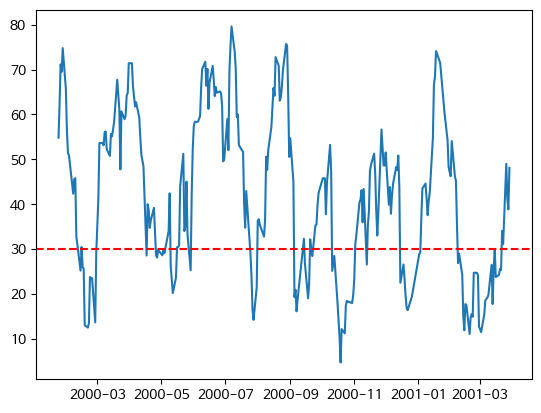

In [69]:
import matplotlib.pyplot as plt
plt.figure((14.9))
plt.plot(df_stock_close['RSI'][14:300])
plt.axhline(y=30, color='r', linestyle='--')
plt.show()